# Day 2 - Embeddings and similarity scores

Welcome back to the Kaggle 5-day Generative AI course!

In this notebook you will use the Gemini API's embedding endpoint to explore similarity scores.

In [1]:
from dotenv import load_dotenv
import os
import google.generativeai as genai  
from openai import OpenAI
from IPython.display import HTML, Markdown, display

# Load the variables from the .env file
load_dotenv()

# Access the variables
gemini_api_key = os.getenv("GOOGLE_API_KEY")


client = OpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/"
)


In [2]:
for model in genai.list_models():
  if 'embedContent' in model.supported_generation_methods:
    print(model.name)

RetryError: Deadline of 60.0s exceeded while calling target function, last exception: 503 Getting metadata from plugin failed with error: ('invalid_grant: Bad Request', {'error': 'invalid_grant', 'error_description': 'Bad Request'})

# 1. Calculate similarity scores

This example embeds some variations on the pangram, The quick brown fox jumps over the lazy dog, including spelling mistakes and shortenings of the phrase. Another pangram and a somewhat unrelated phrase have been included for comparison.

In this task, you are going to use the embeddings to calculate similarity scores, so the task_type for these embeddings is semantic_similarity. Check out the API reference for the full list of tasks.

In [14]:
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]


print("Number of texts ", len(texts))
model = "models/text-embedding-004"

embeds = client.embeddings.create(input=texts,
                                 model=model)
embeds = [x.embedding for x in embeds.data]
print("Number of embeddings ", len(embeds))

Number of texts  8
Number of embeddings  8


[[-0.06261900812387466,
  0.008358473889529705,
  0.020931892096996307,
  0.0234539657831192,
  -0.036601290106773376,
  0.03305480256676674,
  0.016852978616952896,
  0.036087363958358765,
  0.0478070043027401,
  0.0036565999034792185,
  -0.031072817742824554,
  0.03312680125236511,
  0.021608587354421616,
  0.05707244202494621,
  0.0018407677998766303,
  -3.885652040480636e-05,
  0.012503637932240963,
  0.08669894188642502,
  -0.05449158325791359,
  -0.0005350424908101559,
  0.028513967990875244,
  -0.004472641274333,
  -0.0064341723918914795,
  -0.04222995415329933,
  0.0042517767287790775,
  -0.009119619615375996,
  0.00495440186932683,
  -0.013468083925545216,
  0.008117534220218658,
  -0.010380682535469532,
  0.021130671724677086,
  0.09230528026819229,
  0.01299052219837904,
  -0.00850694626569748,
  0.042690474539995193,
  0.029525527730584145,
  -0.04068141058087349,
  0.03525253385305405,
  0.06356754899024963,
  0.012869843281805515,
  -0.08559919148683548,
  -0.016754919663

A similarity score of two embedding vectors can be obtained by calculating their inner product. If  $𝐮$ is the first embedding vector, and  $𝐯$ the second, this is  $𝐮^𝑇 𝐯$. 
As these embedding vectors are normalised to unit length, this is also the cosine similarity.

This score can be computed across all embeddings through the matrix self-multiplication: $df @ df.T$.

Note that the range from 0.0 (completely dissimilar) to 1.0 (completely similar) is depicted in the heatmap from dark (0.0) to light (1.0).

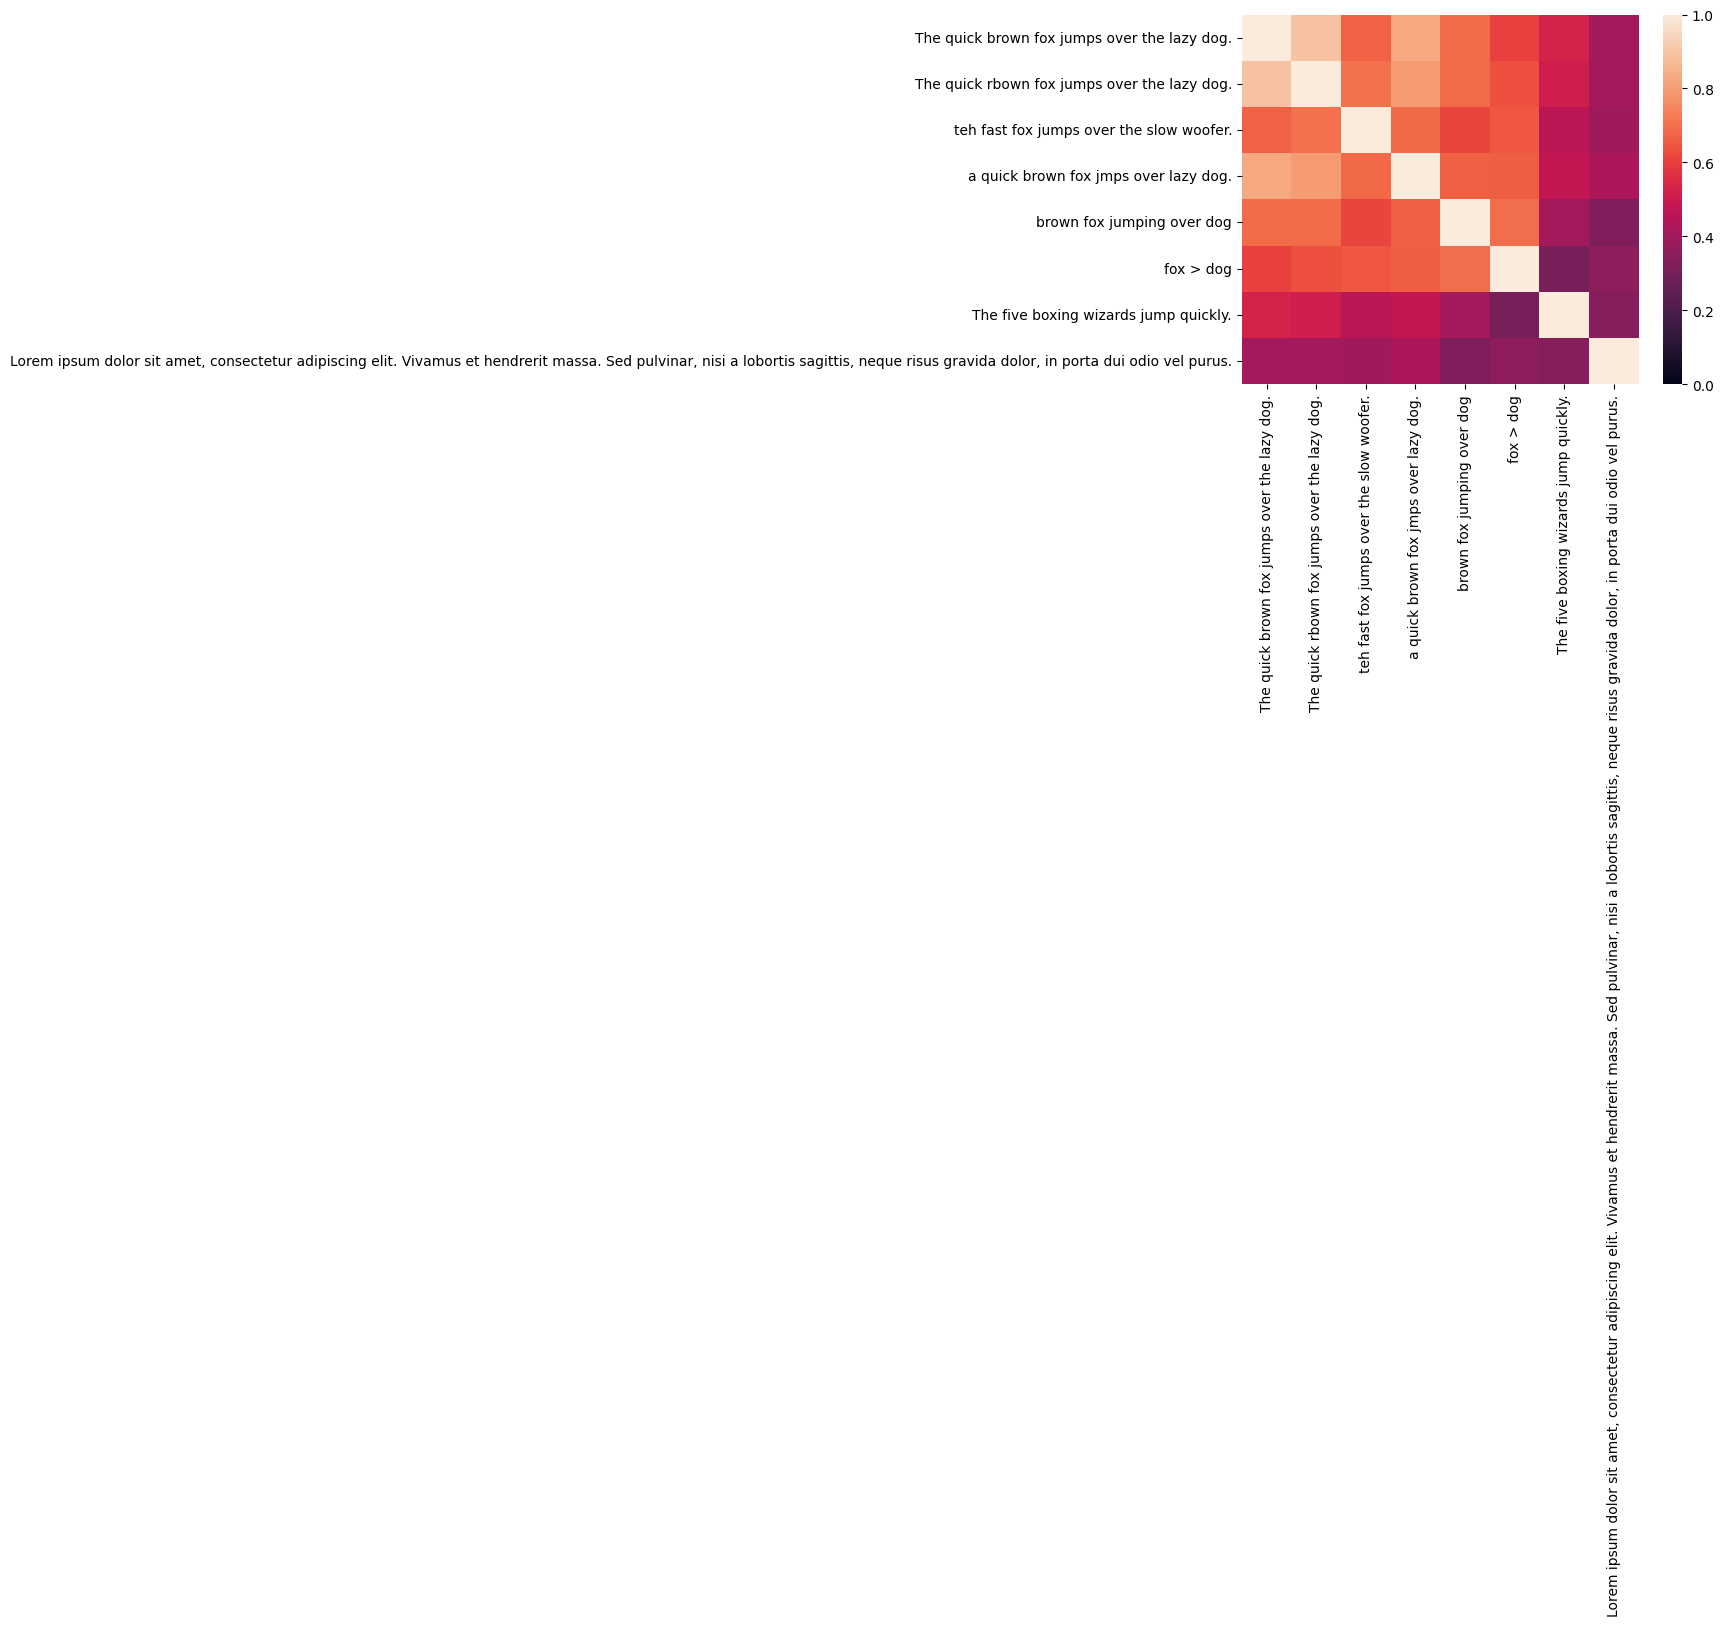

In [15]:
import pandas as pd
import seaborn as sns


# Set up the embeddings in a dataframe.
df = pd.DataFrame(embeds, index=texts)
# Perform the similarity calculation
sim = df @ df.T
# Draw!
sns.heatmap(sim, vmin=0, vmax=1);

In [16]:
# You can see the scores for a particular term directly by looking it up in the dataframe.
sim['The quick brown fox jumps over the lazy dog.'].sort_values(ascending=False)

The quick brown fox jumps over the lazy dog.                                                                                                                                            0.999999
The quick rbown fox jumps over the lazy dog.                                                                                                                                            0.893796
a quick brown fox jmps over lazy dog.                                                                                                                                                   0.831520
brown fox jumping over dog                                                                                                                                                              0.689970
teh fast fox jumps over the slow woofer.                                                                                                                                                0.669237
fox > dog                          